Preprocess the data and organise

In [ ]:
from utils.data_process import generate_dataset
from pathlib import Path

# Move to the project for data process 
path_project= "D:\Documents\Entretiens\Recherche 1er CDI\Listes entreprises\Paris\Trimble\Projet\Road-Field-Classifier"
%cd D:\Documents\Entretiens\Recherche 1er CDI\Listes entreprises\Paris\Trimble\Projet\Road-Field-Classifier

generate_dataset(Path(path_project),
                 ["fields","roads"])

AUgment data + training to save the model .pt + visualise train/val loss history

c:\Users\paulb\anaconda3\envs\myvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True


100%|██████████| 17/17 [00:07<00:00,  2.43it/s, loss=0.614]


Val loss for this epoch = 0.6815882192717658
Accuracy of the network on the 18 validation images: 55.55555555555556 %
New best loss !
=> Saving checkpoint


100%|██████████| 17/17 [00:04<00:00,  4.12it/s, loss=0.483]


Val loss for this epoch = 0.5484791795412699
Accuracy of the network on the 18 validation images: 83.33333333333333 %
New best loss !
=> Saving checkpoint


100%|██████████| 17/17 [00:04<00:00,  4.17it/s, loss=0.664]


Val loss for this epoch = 0.5277070800463358
Accuracy of the network on the 18 validation images: 83.33333333333333 %
New best loss !
=> Saving checkpoint


100%|██████████| 17/17 [00:04<00:00,  4.25it/s, loss=0.422]


Val loss for this epoch = 0.5055080850919088
Accuracy of the network on the 18 validation images: 83.33333333333333 %
New best loss !
=> Saving checkpoint


100%|██████████| 17/17 [00:04<00:00,  3.80it/s, loss=0.335]


Val loss for this epoch = 0.490732815530565
Accuracy of the network on the 18 validation images: 83.33333333333333 %
New best loss !
=> Saving checkpoint


100%|██████████| 17/17 [00:03<00:00,  4.31it/s, loss=0.313]


Val loss for this epoch = 0.4867262575361464
Accuracy of the network on the 18 validation images: 83.33333333333333 %
New best loss !
=> Saving checkpoint


100%|██████████| 17/17 [00:03<00:00,  4.38it/s, loss=0.324]


Val loss for this epoch = 0.5017387171586355
Accuracy of the network on the 18 validation images: 83.33333333333333 %


100%|██████████| 17/17 [00:04<00:00,  3.98it/s, loss=0.554]


Val loss for this epoch = 0.5045029885239072
Accuracy of the network on the 18 validation images: 77.77777777777777 %
=> Saving checkpoint


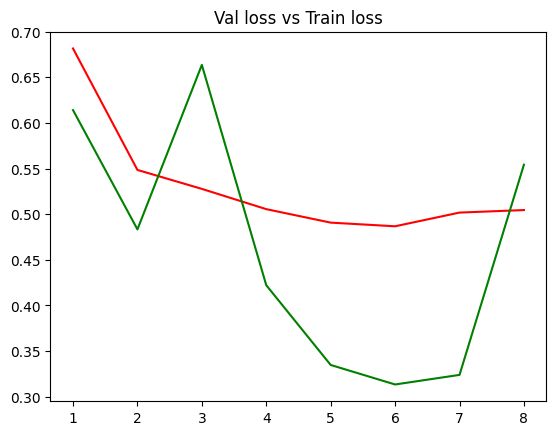

In [1]:
import torch
print(torch.cuda.is_available()) 

#change parameter in the train.py
%run train.py

Load model and evaluate with test data

=> Loading Checkpoint


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


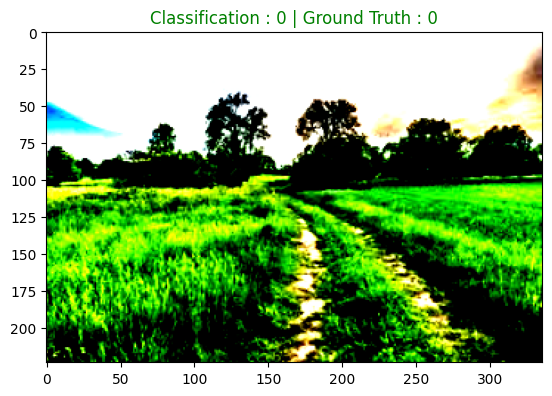

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


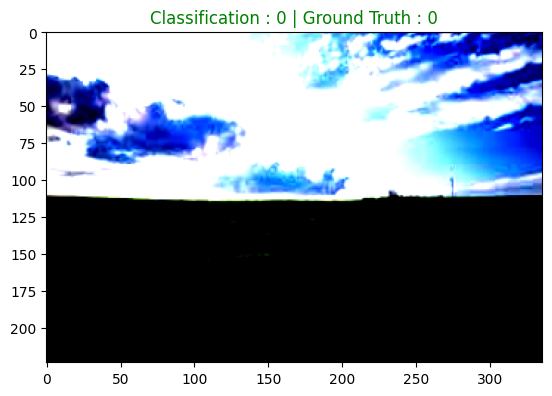

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


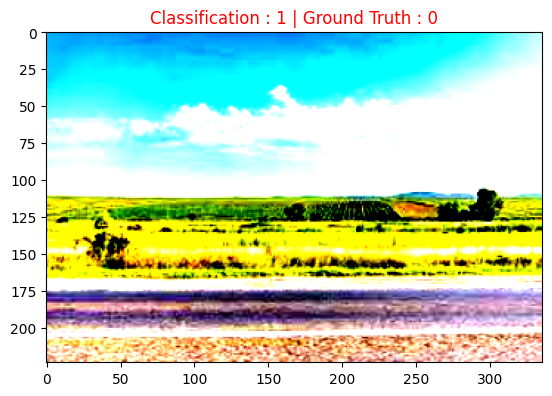

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


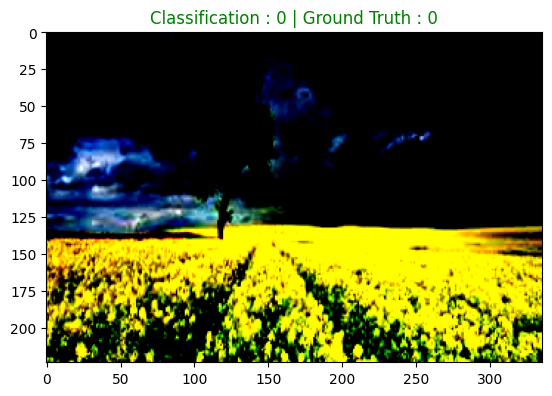

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


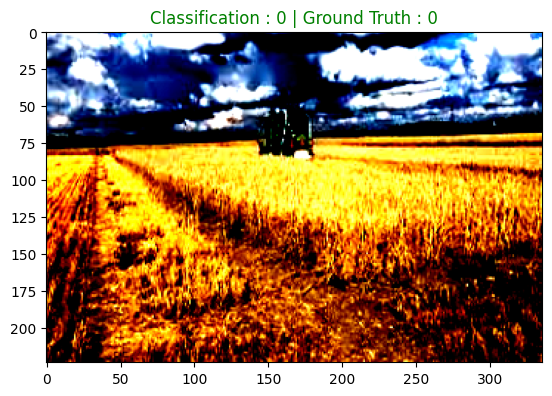

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


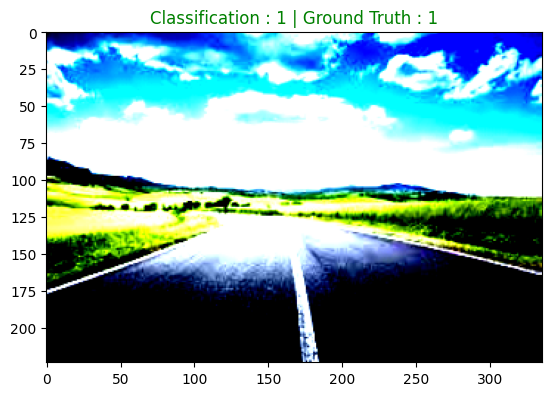

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


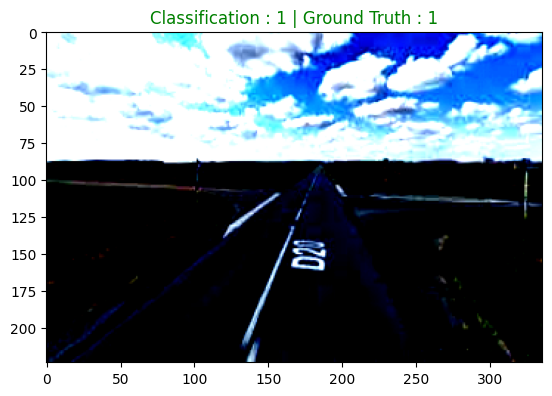

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


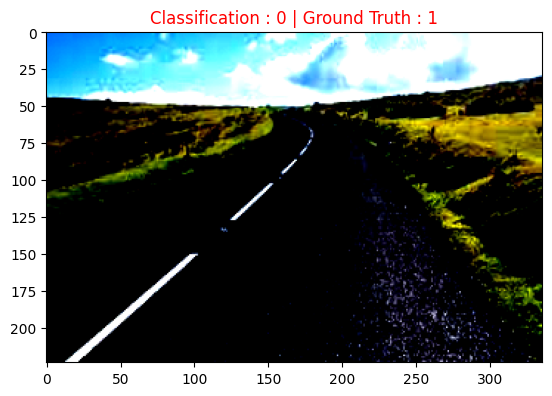

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


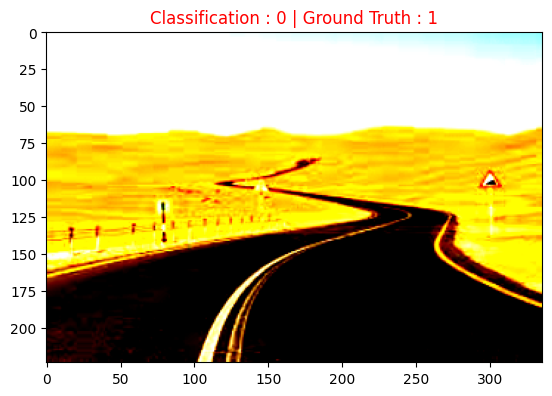

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


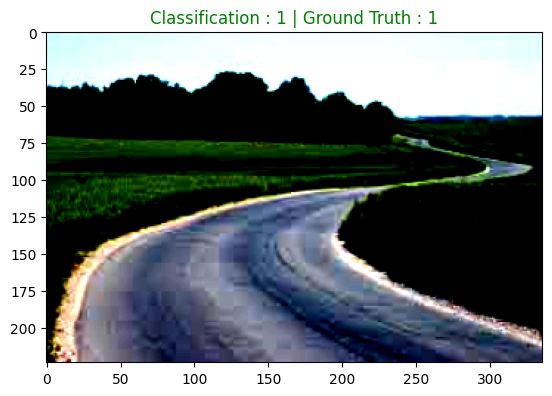

Accuracy of the network on the 10 test images: 70.0 %


In [3]:
from utils.model_utils import load_checkpoint, check_accuracy
from utils.CNN_model import SimpleCNN
from utils.dataset import Field_or_Road
from torch.utils.data import DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch


# Hyperparameters (use the same as during training especially image hegh and width )

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_WORKERS = 4
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 336
PIN_MEMORY = True
TEST_IMG_DIR = "dataset_original/test_images"
MODEL_NAME = "model_name_best1.pt"

test_transform = A.Compose(
        [
            A.Resize(height = IMAGE_HEIGHT, width = IMAGE_WIDTH),
            A.Normalize(
                mean=[0.485, 0.456, 0.406],     # standard normalisation parameters for ImagNet
                std=[0.229, 0.224, 0.225], 
                max_pixel_value = 255.0,
            ),
            ToTensorV2(),
        ],
    )
test_ds = Field_or_Road(image_dir = TEST_IMG_DIR,
                        transform = test_transform)
test_loader = DataLoader(
    test_ds,
    batch_size= 1,
    num_workers= NUM_WORKERS,
    pin_memory= PIN_MEMORY,
    shuffle= False,
)

model = SimpleCNN(IMAGE_HEIGHT,IMAGE_WIDTH).to(device = DEVICE)
load_checkpoint(torch.load(MODEL_NAME),model)
check_accuracy(test_loader,model,plot=True,device= DEVICE)